In [38]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, PolynomialFeatures, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

load the data:

In [39]:
df = pd.read_csv('drug200.csv')
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


check for duplicated rows:

In [40]:
df.duplicated().sum()

0

missing values:

In [41]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

some informations about the data:

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


### Univariate analysis

In [43]:
df['Age'].describe()

count    200.000000
mean      44.315000
std       16.544315
min       15.000000
25%       31.000000
50%       45.000000
75%       58.000000
max       74.000000
Name: Age, dtype: float64

<Axes: xlabel='Age'>

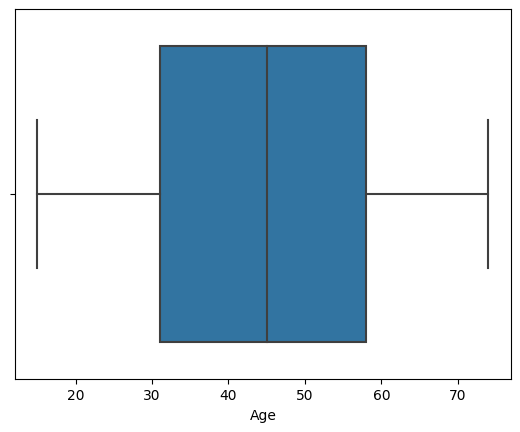

In [44]:
sns.boxplot(data=df, x='Age')

<Axes: xlabel='Age', ylabel='Count'>

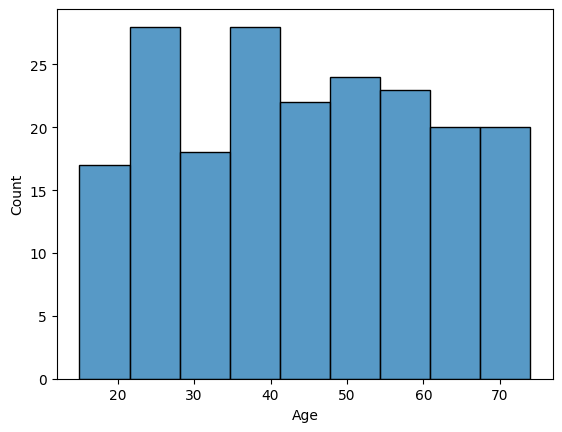

In [45]:
sns.histplot(data=df, x='Age')

In [46]:
df['Sex'].unique()

array(['F', 'M'], dtype=object)

<Axes: xlabel='Sex', ylabel='Count'>

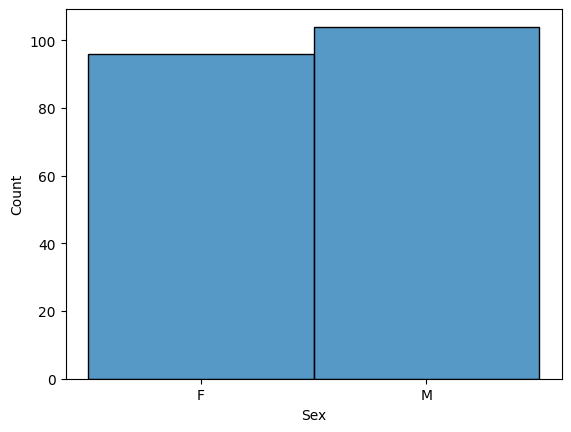

In [47]:
sns.histplot(data=df, x='Sex')

In [48]:
df['BP'].value_counts()

BP
HIGH      77
LOW       64
NORMAL    59
Name: count, dtype: int64

<Axes: xlabel='BP', ylabel='Count'>

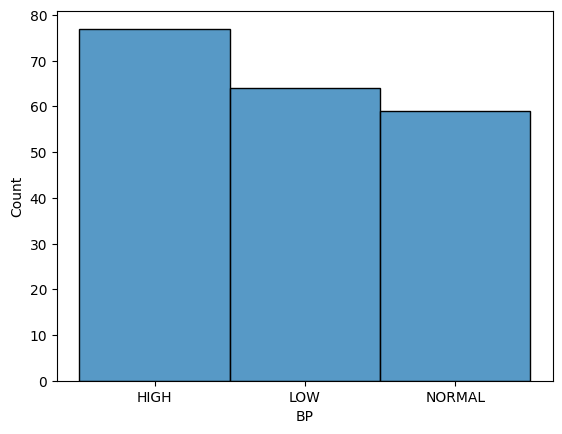

In [49]:
sns.histplot(data=df, x='BP')

In [50]:
df['Cholesterol'].value_counts()

Cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64

<Axes: xlabel='Cholesterol', ylabel='Count'>

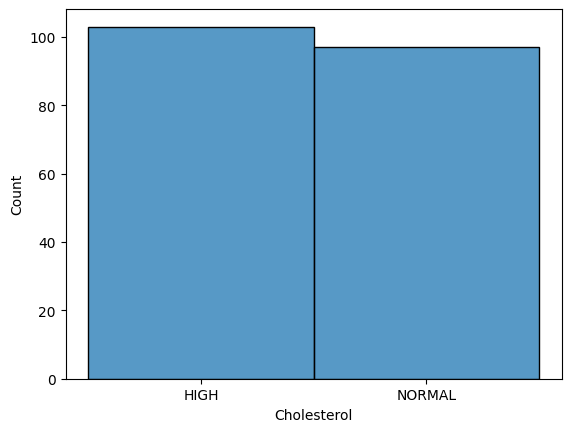

In [51]:
sns.histplot(data=df, x='Cholesterol')

In [52]:
df['Na_to_K'].describe()

count    200.000000
mean      16.084485
std        7.223956
min        6.269000
25%       10.445500
50%       13.936500
75%       19.380000
max       38.247000
Name: Na_to_K, dtype: float64

<Axes: xlabel='Na_to_K'>

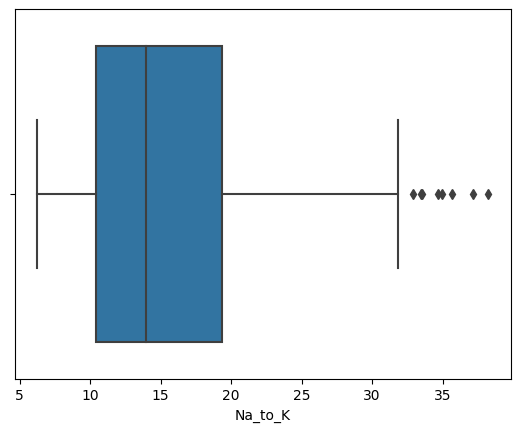

In [53]:
sns.boxplot(data=df, x='Na_to_K')

In [54]:
df['Drug'].value_counts()

Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

### bivariate analysis

In [55]:
px.histogram(data_frame=df, x='Sex', color='Drug', barmode='group')

In [56]:
px.histogram(data_frame=df , x ="Na_to_K" , color="Drug" , barmode="group")

Encoding the categorical data : 

In [57]:
Sex_dict = {'F':0, 'M':1}

In [58]:
df['Sex'] = df['Sex'].map(Sex_dict)

In [59]:
BP_dict = {'HIGH':3, 'LOW':1, 'NORMAL':2}

In [60]:
df['BP'] = df['BP'].map(BP_dict)

In [61]:
Cholesterol_dict = {'HIGH':2, 'NORMAL':1}

In [62]:
df['Cholesterol'] = df['Cholesterol'].map(Cholesterol_dict)

Features and targets: 

In [63]:
x = df.drop('Drug', axis=1)
y = df['Drug']

Encoding the target values:

In [64]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)

Spliting the data into train and test splits:

In [65]:
x_train , x_test , y_train , y_test = train_test_split(x,y,train_size=0.8 ,stratify=y , random_state=7)

scaling the train data:

In [66]:
scaler = StandardScaler()
x_train[['Age', 'Na_to_K']] = scaler.fit_transform(x_train[['Age', 'Na_to_K']])
x_test[['Age', 'Na_to_K']] = scaler.transform(x_test[['Age', 'Na_to_K']])

Dealing with the imbalanced distribution in the target data:

In [67]:
yy = pd.DataFrame(y, columns=['drug_class'])

In [68]:
yy['drug_class'].value_counts()

drug_class
0    91
4    54
1    23
3    16
2    16
Name: count, dtype: int64

In [70]:
strategy = {4:70, 3:40, 2:40}
smote = SMOTE(sampling_strategy=strategy, random_state=7)

In [71]:
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

applying LogisticRegression:

In [72]:
model = LogisticRegression(multi_class='ovr', C=0.4)

In [73]:
model.fit(x_train_smote, y_train_smote)

LogisticRegression(C=0.4, multi_class='ovr')

In [74]:
y_train_pred = model.predict(x_train_smote)
y_test_pred = model.predict(x_test)

In [75]:
print(f"Train Acc is {accuracy_score(y_true=y_train_smote , y_pred = y_train_pred)}")
print(f"Test Acc is {accuracy_score(y_true=y_test , y_pred = y_test_pred)}")

Train Acc is 0.9253112033195021
Test Acc is 0.925
